In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### What are the different types of Missing Data?

1.Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [9]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2 . Missing data not at Random : Systematic missing values

there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset

In [11]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

## find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [12]:
df['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int32

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [14]:
# check whether the missing cabin values belongs to survived people and non-missing cabin values belongs to survived people

In [15]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### 3. Missing at Random (MAR)

### techniques of handling missing values

1. mean/median/mode 
2. Random sample imputation
3. capturing NaN values with a new feature
4. End of distribution impuation
5. Arbitrary impuation
6. Frequent categories imputation


### 1.  Mean Median Mode imputation

When should we apply
mean/median has the assumpation that the data are missing completely at random
solve this by replacing the NAN with most frequent occurance of the varible

In [19]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])

In [20]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
def impute_nan(df,variable,median):
    df[variable+'_Median'] = df[variable].fillna(median)

In [29]:
median = df.Age.median()
median

28.0

In [30]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [31]:
print(df['Age'].std())
print(df['Age_Median'].std())

14.526497332334044
13.019696550973194


In [34]:
import matplotlib.pyplot as plt

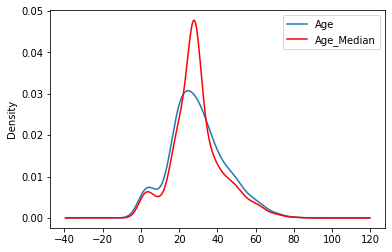

In [47]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax= ax)
df['Age_Median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages and disadvantages of mean/median imputation

Advantages
1. Easy to implement
2. faster way to obtain the complete dataset

Disadvantages
1. change / distortion in the orignial variance in the data
2. impacts correlation
